In [1]:
%run Data_Science_Preprocessing.ipynb

2020-11-01 18:36:36 [scrapy.utils.log] INFO: Scrapy 2.3.0 started (bot: scrapybot)
2020-11-01 18:36:36 [scrapy.utils.log] INFO: Versions: lxml 4.5.2.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 20.3.0, Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1h  22 Sep 2020), cryptography 3.1.1, Platform Windows-10-10.0.19041-SP0
2020-11-01 18:36:36 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

2020-11-01 18:37:59 [matplotlib] DEBUG: (private) matplotlib data path: C:\Users\julia\anaconda3\envs\Data Science\lib\site-packages\matplotlib\mpl-data
2020-11-01 18:37:59 [matplotlib] DEBUG: matplotlib data path: C:\Users\julia\anaconda3\envs\Data Science\lib\site-packages\matplotlib\mpl-data
2020-11-01 18:37:59 [matplotlib] DEBUG: CONFIGDIR=C:\Users\julia\.matplotlib
2020-11-01 18:37:59 [matplotlib] DEBUG: matplotlib version 3.3.1
2020-11-01 18:37:59 [matplotlib] DEBUG: interactive is False
2020-11-01 18:37:59 [matplotlib] DEBUG: platform is win32
2020-11-01 18:37:59 [matplotlib] DEBUG: loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'nt', 'winreg', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'encodings.cp1252', 'site', 'os', 'stat', '_stat', '_collect

2020-11-01 18:37:59 [matplotlib] DEBUG: CACHEDIR=C:\Users\julia\.matplotlib
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: Using fontManager instance from C:\Users\julia\.matplotlib\fontlist-v330.json
2020-11-01 18:37:59 [matplotlib.pyplot] DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2020-11-01 18:37:59 [matplotlib.pyplot] DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2020-11-01 18:37:59 [matplotlib.pyplot] DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'DejaVu Sans' (

2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial monospaced for SAP' (arimonbd.ttf) normal normal 700 normal>) = 10.335
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Goudy Old Style' (GOUDOS.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'EuropeExt' (EuropeExt.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rockwell Extra Bold' (ROCKEB.TTF) normal normal 800 normal>) = 10.43
2020-11-0

2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Garamond' (GARABD.TTF) normal normal 700 normal>) = 10.335
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal 700 normal>) = 11.335
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_PSTC.TTF) normal normal 300 normal>) = 10.145
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal 350 normal>) = 11.0975
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Candara' (Candarai.ttf) italic normal 400 normal>) = 11.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'SAPDings' (sapdn.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager

2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.0975
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Bright' (LBRITE.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Trebuchet MS' (trebuc.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI Emoji' (seguiemj.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Broadway' (BROADW.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 600 normal>) = 10.24
2020-11-01 18:37:59 [matplotlib

2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TI-Nspire Sans' (TINSSaBD.TTF) normal normal 700 normal>) = 10.335
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 600 normal>) = 10.24
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal 700 normal>) = 4.971363636363637
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal 700 condensed>) = 10.535
2020-11-01 18

2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rockwell Condensed' (ROCC____.TTF) normal normal 400 condensed>) = 10.25
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Micra' (Micra-Normal.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Times New Roman' (times.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TINspireKeys' (TINspireKeys.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Ravie' (RAVIE.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700 normal>) = 11.335
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Garamond' (GARA.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib

2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Perpetua' (PER_____.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'SAPIcons' (sapin.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>) = 11.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_CBI.TTF) italic normal 700 condensed>) = 11.535
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal 700 normal>) = 10.335
2020-11-01 18:37:59 [matplotl

2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Cooper Black' (COOPBL.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'HP Simplified' (HPSimplified_Bd.ttf) normal normal 700 normal>) = 10.335
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Comic Sans MS' (comici.ttf) italic normal 400 normal>) = 11.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'SAPGUI-Icons' (SAPGUI-icons.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tw Cen MT Condensed Extra Bold' (TCCEB.TTF) normal normal 400 condensed>) = 10.25
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Castellar' (CASTELAR.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal 300 normal>) = 11.145


2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal 400 normal>) = 11.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Consolas' (consolab.ttf) normal normal 700 normal>) = 10.335
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tempus Sans ITC' (TEMPSITC.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Parchment' (PARCHM.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR DECODE' (ARDECODE.ttf) normal normal 5 normal>) = 10.42525
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_CB.TTF) normal normal 700 condensed>) = 10.535
2020-11-01 18:37:59 [matp

2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Times New Roman' (times.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Cuprum' (Cuprum-Italic.ttf) italic normal 400 normal>) = 11.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TI-Nspire Sans' (TINSSaBI.TTF) italic normal 700 normal>) = 11.335
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Forte' (FORTE.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TI-Nspire' (TI-NspireBd.ttf) normal normal 700 normal>) = 10.335
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Edwardian Script ITC' (ITCEDSCR.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:37:

2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal 700 normal>) = 10.335
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TI-Nspire Sans' (TINSSaIT.TTF) italic normal 400 normal>) = 11.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR BLANCA' (ARBLANCA.ttf) normal normal 5 normal>) = 10.42525
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal 400 normal>) = 10.05
2020-11-01 1

2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR DELANEY' (ARDELANEY.ttf) normal normal 5 normal>) = 10.42525
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gloucester MT Extra Condensed' (GLECB.TTF) normal normal 400 condensed>) = 10.25
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial Rounded MT Bold' (ARLRDBD.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial Unicode MS' (ARIALUNI.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Candara' (Candarali.ttf) italic normal 400 normal>) = 11.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Papyrus' (PAPYRUS.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal 700 normal>) = 10.335
2

2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Franklin Gothic Heavy' (FRAHV.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Sitka Small' (Sitka.ttc) normal normal 400 normal>) = 10.05
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal 700 normal>) = 10.335
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rockwell' (ROCKB.TTF) normal normal 700 normal>) = 10.335
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.335
2020-11-01 18:37:59 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rockwell' (ROCKBI.TTF) italic normal 700 normal>) = 11.335
2020-11-01 18:37:59 [matpl

2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'High Tower Text' (HTOWERTI.TTF) italic normal 400 normal>) = 11.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Blackadder ITC' (ITCBLKAD.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal 700 normal>) = 10.335
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial' (ariblk.ttf) normal normal 900 normal>) = 6.888636363636364
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Goudy Stout' (GOUDYSTO.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
2020-11

2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'GeForce' (GeForce_Light.otf) normal normal 300 normal>) = 10.145
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR DESTINE' (ARDESTINE.ttf) normal normal 5 normal>) = 10.42525
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR CARTER' (ARCARTER.ttf) normal normal 5 normal>) = 10.42525
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tw Cen MT Condensed Extra Bold' (TCCEB.TTF) normal normal 400 condensed>) = 10.25
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('C:\\Users\\julia\\anaconda3\\envs\\Data Science\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') w

2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Harlow Solid Italic' (HARLOWSI.TTF) italic normal 400 normal>) = 11.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal 700 normal>) = 10.335
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TINspireKeysCX' (TINspireKeysCX.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Goudy Old Style' (GOUDOSI.TTF) italic normal 400 normal>) = 11.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.335
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal 400 normal>) = 10.05
202

2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal 700 normal>) = 10.335
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans MT' (GILI____.TTF) italic normal 400 normal>) = 11.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Informal Roman' (INFROMAN.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Consolas' (consola.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Freestyle Script' (FREESCPT.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matpl

2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Yu Gothic' (YuGothB.ttc) normal normal 700 normal>) = 10.335
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Fax' (LFAXI.TTF) italic normal 400 normal>) = 11.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bookman Old Style' (BOOKOSI.TTF) italic normal 300 normal>) = 11.145
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Wide Latin' (LATINWD.TTF) normal normal 400 expanded>) = 10.25
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR HERMANN' (ARHERMANN.ttf) normal normal 5 normal>) = 10.42525
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (segoeuiz.ttf) italic normal 700 normal>) = 11.335
2020-11-01 18:38:00 [

2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tw Cen MT' (TCM_____.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'NDO' (NDO_v4.0.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'GeForce' (GeForce_Bold.otf) normal normal 700 normal>) = 10.335
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rockwell' (ROCKB.TTF) normal normal 700 normal>) = 10.335
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_CR.TTF) normal normal 400 condensed>) = 10.25
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tw Cen MT' (TCBI____.TTF) italic normal 700 normal>) = 11.335
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TI-Nspire' (TI-NspireBdIt.ttf) italic normal 700 normal>) = 11.335
2020-11-01 18:38:00 [matplotlib.font_ma

2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Niagara Engraved' (NIAGENG.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Fax' (LFAXD.TTF) normal normal 600 normal>) = 10.24
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 600 normal>) = 11.24
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans Typewriter' (LTYPE.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tahoma' (tahomabd.ttf) normal normal 700 normal>) = 10.335
2020-11-01 18:38:00 [matplotlib.f

2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Consolas' (consolab.ttf) normal normal 700 normal>) = 10.335
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR DESTINE' (ARDESTINE.ttf) normal normal 5 normal>) = 10.42525
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Viner Hand ITC' (VINERITC.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial' (ARIALNI.TTF) italic normal 400 condensed>) = 7.613636363636363
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Comic Sans MS' (comici.ttf) italic normal 400 normal>) = 11.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.335
2020-11-01 18:38:00 

2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Constantia' (constani.ttf) italic normal 400 normal>) = 11.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Copperplate Gothic Light' (COPRGTL.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal 350 normal>) = 10.0975
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.25
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal 300 normal>) = 11.145
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tw Cen MT Condensed' (TCCM____.TTF) normal normal 400 condensed>) = 10.25
2020-11-01 1

2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 11.335
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Niagara Solid' (NIAGSOL.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bell MT' (BELL.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Juice ITC' (JUICE___.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Visitor TT1 BRK' (visitor TT1 BRK.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Courier New' (courbd.ttf) normal normal 700 normal>) = 10.335
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans MT Condensed' (GILC____.TTF) normal normal 400 condensed>) = 10.25
2020-11-01 1

2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Cuprum' (Cuprum-BoldItalic.ttf) italic normal 700 normal>) = 11.335
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Agency FB' (AGENCYR.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Sylfaen' (sylfaen.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'MV Boli' (mvboli.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplot

2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Fax' (LFAXDI.TTF) italic normal 600 normal>) = 11.24
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'HP Simplified' (HPSimplified_Rg.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Informal Roman' (INFROMAN.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal 700 condensed>) = 10.535
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
2020

2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe Print' (segoeprb.ttf) normal normal 700 normal>) = 10.335
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.0975
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TI-Nspire Sans' (TINSSaRG.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'MS Reference Sans Serif' (REFSAN.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 11.335
2020-11-01 18:3

2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Century Schoolbook' (SCHLBKB.TTF) normal normal 700 normal>) = 10.335
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 normal>) = 11.335
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Century Gothic' (GOTHICBI.TTF) italic normal 700 normal>) = 11.335
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Calligraphy' (LCALLIG.TTF) italic normal 400 normal>) = 11.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Nirmala UI' (NirmalaB.ttf) normal normal 700 normal>) = 10.335
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Franklin Gothic Medium' (framdit.ttf) italic normal 400 normal>) = 11.

2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal 600 normal>) = 11.24
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.25
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (segoeuib.ttf) normal normal 700 normal>) = 10.335
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR CHRISTY' (ARCHRISTY.ttf) normal normal 5 normal>) = 10.42525
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Berlin Sans FB' (BRLNSB.TTF) normal normal 700 normal>) = 10.335
2020-11-01 18:38:00 [matplotlib.font_

2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'SimSun-ExtB' (simsunb.ttf) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans MT' (GIL_____.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Franklin Gothic Demi' (FRADM.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Elephant' (ELEPHNT.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Eras Medium ITC' (ERASMD.TTF) normal normal 400 normal>) = 10.05
2020-11-01 18:38:00 [matplotlib.fo

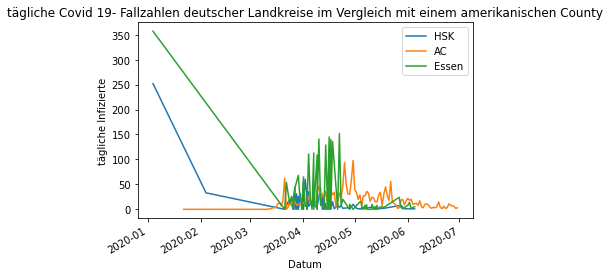

In [3]:
ax = plt.gca()
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="HSK")
dic['Albany County'].plot(kind='line', x = 'date', y= 'dailycases', ax=ax, label="AC")
d['Essen'].plot(kind='line', x = 'publication_datetime', y= 'dailycases', ax=ax, label="Essen")
ax.set_title('tägliche Covid 19- Fallzahlen deutscher Landkreise im Vergleich mit einem amerikanischen County')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Infizierte')

plt.show()

Man kann sehen, dass die Daten erst ab mitte März wirklich brauchbar sind, da vorher der Virus auch noch nicht in den westlichen Staaten vorhanden war

Text(0, 0.5, 'tägliche Todeszahlen deutscher Landkreise')

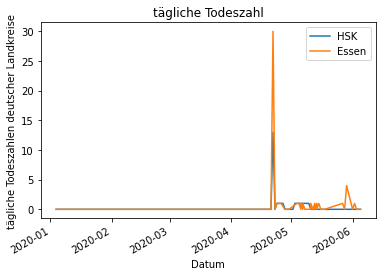

In [4]:
ax = plt.gca()
d['Hochsauerlandkreis'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths', ax=ax, label="HSK")
d['Essen'].plot(kind='line', x = 'publication_datetime', y= 'dailydeaths', ax=ax, label="Essen")

ax.set_title('tägliche Todeszahl')
ax.set_xlabel('Datum')
ax.set_ylabel('tägliche Todeszahlen deutscher Landkreise')

Text(0.5, 1.0, 'Höhe der täglich gemeldeten Fallzahlen im Hochsauerlandkreis')

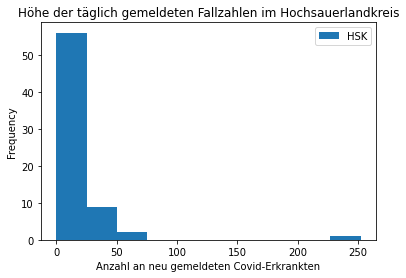

In [5]:
ax = plt.gca()

d['Hochsauerlandkreis'].plot(kind='hist', x = 'publication_datetime', y= 'dailycases', ax=ax, label="HSK")
ax.set_xlabel('Anzahl an neu gemeldeten Covid-Erkrankten')
ax.set_title('Höhe der täglich gemeldeten Fallzahlen im Hochsauerlandkreis')


Zeigt an dass die meisten täglichen Meldungen Meldungen mit zwischen 0 und 25 neue Infizierten hatten
Hat nicht so geklappt wie es sollte (Sollte zsmhang zwischen gemeldeten Wochentag und der höhe der Infektionszahlen zeigen)

2020-11-01 18:38:01 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-11-01 18:38:01 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-11-01 18:38:01 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-11-01 18:38:01 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


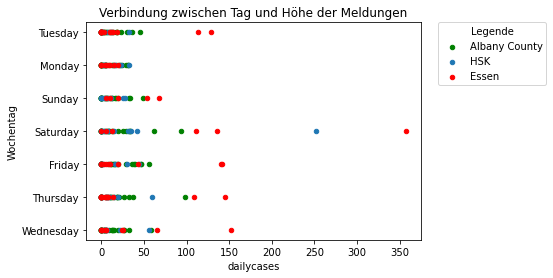

In [6]:
ax = plt.gca()
dic['Albany County'].plot(kind='scatter', x = 'dailycases', y= 'Weekday', ax=ax, label="Albany County", color = 'green')
d['Hochsauerlandkreis'].plot(kind='scatter', x = 'dailycases', y= 'Wochentag', ax=ax, label="HSK")
d['Essen'].plot(kind='scatter', x = 'dailycases', y= 'Wochentag', ax=ax, label="Essen", color = 'red')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Legende") 
_=ax.set_title('Verbindung zwischen Tag und Höhe der Meldungen')

Zeigt das an was eigentlich das Histogramm nachweisen sollte. Man sieht dass kein Zusammenhang zwischen dem Wochentag und der höhe der Meldung besteht

In [36]:
import datetime as dt
import statsmodels.formula.api as smf

In [52]:
# bundzuwachsraw_1 Werte der Bundesländer bis zum 30.06
# bundzuwachsraw_2 Werte der Bundesländer ab de0 01.07
# Das Datum muss in einen Float umgewandelt werden um damit rechnen zu können
bundzuwachsraw_1['date'] = bundzuwachsraw_1.index
bundzuwachsraw_1['datef'] = pd.to_datetime(bundzuwachsraw_1['date'])
bundzuwachsraw_1['datef']=bundzuwachsraw_1['datef'].map(dt.datetime.toordinal)
bundzuwachsraw_2['date'] = bundzuwachsraw_2.index
bundzuwachsraw_2['datef'] = pd.to_datetime(bundzuwachsraw_2['date'])
bundzuwachsraw_2['datef']=bundzuwachsraw_2['datef'].map(dt.datetime.toordinal)

In [53]:
y = np.asarray(bundzuwachsraw_1['Gesamt'])
X = bundzuwachsraw_1[['datef']]

lm = smf.ols(formula='Gesamt ~ datef', data=bundzuwachsraw_1).fit()
predi = lm.predict(bundzuwachsraw_2['datef'])
bundzuwachsraw_2['prediction'] = predi

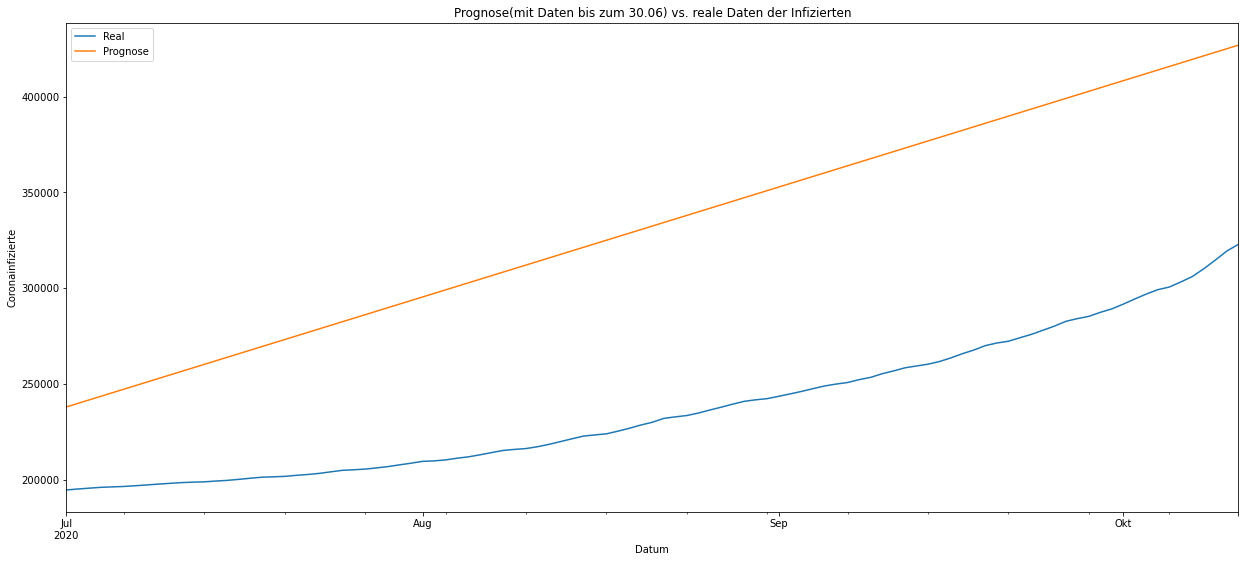

In [55]:
ax = plt.gca()
bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'Gesamt', ax=ax, label="Real")
bundzuwachsraw_2.plot(kind='line', x = 'date', y= 'prediction', ax=ax, label="Prognose")
ax.set_title('Prognose(mit Daten bis zum 30.06) vs. reale Daten der Infizierten')
ax.set_xlabel('Datum')
ax.set_ylabel('Coronainfizierte')
plt.show()

Man kann sehr gut sehen, dass die realen Daten unter der Prognose liegen, somit kann man sagen, dass es in Deutschland keine exponentielle Steigung der Coronainfizierten gab.

In [11]:
import geopandas as gpd
bundesland_capital = pd.read_csv('bundcap.csv')
bundesland_capital = gpd.GeoDataFrame(bundesland_capital, geometry=gpd.points_from_xy(bundesland_capital.Longitude, bundesland_capital.Latitude))
bundesland_capitalname = bundesland_capital 

2020-11-01 18:38:02 [fiona.env] DEBUG: Entering env context: <fiona.env.Env object at 0x00000222996773C8>
2020-11-01 18:38:02 [fiona.env] DEBUG: Starting outermost env
2020-11-01 18:38:02 [fiona.env] DEBUG: No GDAL environment exists
2020-11-01 18:38:02 [fiona.env] DEBUG: New GDAL environment <fiona._env.GDALEnv object at 0x00000222994C4D08> created
2020-11-01 18:38:02 [fiona._env] DEBUG: Logging error handler pushed.
2020-11-01 18:38:02 [fiona._env] DEBUG: All drivers registered.
2020-11-01 18:38:02 [fiona._env] DEBUG: GDAL_DATA found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\gdal'.
2020-11-01 18:38:02 [fiona._env] DEBUG: PROJ_LIB found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\proj'.
2020-11-01 18:38:02 [fiona._env] DEBUG: Started GDALEnv <fiona._env.GDALEnv object at 0x00000222994C4D08>.
2020-11-01 18:38:02 [fiona.env] DEBUG: Updated existing <fiona._env.GDALEnv object at 0x00000222994C4D08> with options

2020-11-01 18:38:02 [fiona.env] DEBUG: Entering env context: <fiona.env.Env object at 0x00000222996C1BC8>
2020-11-01 18:38:02 [fiona.env] DEBUG: Starting outermost env
2020-11-01 18:38:02 [fiona.env] DEBUG: No GDAL environment exists
2020-11-01 18:38:02 [fiona.env] DEBUG: New GDAL environment <fiona._env.GDALEnv object at 0x0000022298F5A708> created
2020-11-01 18:38:02 [fiona._env] DEBUG: Logging error handler pushed.
2020-11-01 18:38:02 [fiona._env] DEBUG: All drivers registered.
2020-11-01 18:38:02 [fiona._env] DEBUG: GDAL_DATA found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\gdal'.
2020-11-01 18:38:02 [fiona._env] DEBUG: PROJ_LIB found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\proj'.
2020-11-01 18:38:02 [fiona._env] DEBUG: Started GDALEnv <fiona._env.GDALEnv object at 0x0000022298F5A708>.
2020-11-01 18:38:02 [fiona.env] DEBUG: Updated existing <fiona._env.GDALEnv object at 0x0000022298F5A708> with options

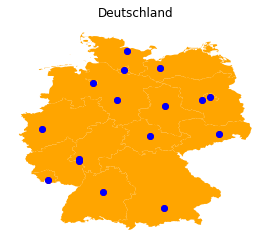

In [12]:
germap = gpd.read_file('geomap/vg2500_bld.shp')
ax = germap.plot(color='orange')

ax = bundesland_capital.plot(ax=ax, color='red')
ax = bundesland_capitalname.plot(ax=ax, color='blue') #Damit sollen eigentlich die Städtenamen angezeigt werden und keine blauen Punke


plt.rcParams['figure.figsize'] = [21, 9]
ax.set_title('Deutschland')
ax.set_axis_off()

plt.show()

Wurde nur für Tests genutzt, wird wahrscheinlich am Ende wieder gelöscht

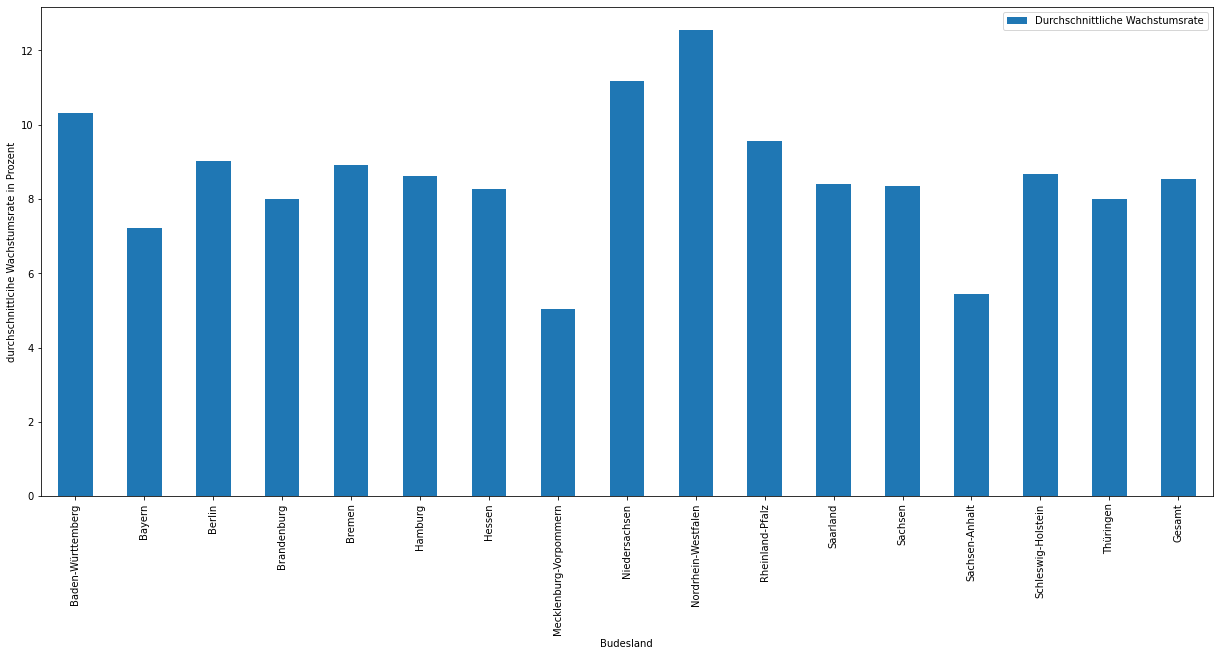

In [13]:
bars = durchwachstumfnl.plot.bar(x = 'Bundesland', y = 'AGR',label='Durchschnittliche Wachstumsrate',xlabel='Budesland',ylabel='durchschnittlcihe Wachstumsrate in Prozent');

2020-11-01 18:38:02 [fiona.env] DEBUG: Entering env context: <fiona.env.Env object at 0x0000022299C1B848>
2020-11-01 18:38:02 [fiona.env] DEBUG: Starting outermost env
2020-11-01 18:38:02 [fiona.env] DEBUG: No GDAL environment exists
2020-11-01 18:38:02 [fiona.env] DEBUG: New GDAL environment <fiona._env.GDALEnv object at 0x0000022299820F08> created
2020-11-01 18:38:02 [fiona._env] DEBUG: Logging error handler pushed.
2020-11-01 18:38:02 [fiona._env] DEBUG: All drivers registered.
2020-11-01 18:38:02 [fiona._env] DEBUG: GDAL_DATA found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\gdal'.
2020-11-01 18:38:02 [fiona._env] DEBUG: PROJ_LIB found in environment: 'C:\\Users\\julia\\anaconda3\\envs\\Data Science\\Library\\share\\proj'.
2020-11-01 18:38:02 [fiona._env] DEBUG: Started GDALEnv <fiona._env.GDALEnv object at 0x0000022299820F08>.
2020-11-01 18:38:02 [fiona.env] DEBUG: Updated existing <fiona._env.GDALEnv object at 0x0000022299820F08> with options

2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal 700 normal>) = 11.71215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Ravie' (RAVIE.TTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rockwell Condensed' (ROCCB___.TTF) normal normal 700 condensed>) = 10.912149999999999
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rockwell Extra Bold' (ROCKEB.TTF) normal normal 800 normal>) = 10.80715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Corbel' (corbell.ttf) normal normal 300 normal>) = 10.

2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 5.063513636363637
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Franklin Gothic Medium Cond' (FRAMDCN.TTF) normal normal 400 condensed>) = 10.627149999999999
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal 700 normal>) = 10.71215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bookman Old Style' (BOOKOS.TTF) normal normal 300 normal>) = 10.33215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 4.063513636363637
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Georgia' (georgia.ttf) normal norma

2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal 600 normal>) = 10.61715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Latha' (462364.ttf) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'AR DARLING' (ARDARLING.ttf) normal normal 5 normal>) = 10.0519
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Cuprum' (Cuprum-Bold.ttf) normal normal 700 normal>) = 10.71215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans' (LSANSDI.TTF) italic normal 600 normal>) = 11.61715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Candara' (Candaral.ttf) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TINspireKeysTouch' (TINspireKeysTouch.ttf) normal normal 400 normal>) = 10.42715
2020-11-01 18

2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (seguibl.ttf) normal normal 900 normal>) = 10.90215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Eras Bold ITC' (ERASBD.TTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bookman Old Style' (BOOKOSBI.TTF) italic normal 600 normal>) = 11.61715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial' (ariblk.ttf) normal normal 900 normal>) = 7.265786363636363
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Century' (CENTURY.TTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Fax' (LFAXDI.TTF) italic normal 600 normal>) = 11.61715
2020-1

2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'HP Simplified' (HPSimplified_Lt.ttf) normal normal 300 normal>) = 10.33215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal 700 normal>) = 11.71215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 11.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Magneto' (MAGNETOB.TTF) normal normal 700 normal>) = 10.71215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans' (LSANS.TTF) normal normal 400 normal>)

2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'MicraC' (MICRAC.OTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Sitka Small' (SitkaZ.ttc) italic normal 700 normal>) = 11.71215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Nirmala UI' (NirmalaB.ttf) normal normal 700 normal>) = 10.71215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal 300 normal>) = 11.33215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Script MT Bold' (SCRIPTBL.TTF) normal normal 700 normal>) = 10.71215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Mistral' (MISTRAL.TTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Juice ITC' (JUICE___.TTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [ma

2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.71215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Cuprum' (Cuprum-Regular.ttf) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Cuprum' (Cuprum-Italic.ttf) italic normal 400 normal>) = 11.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bodoni MT' (BOD_B.TTF) normal normal 700 normal>) = 10.71215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Franklin Gothic Heavy' (FRAHVIT.TTF) italic normal 400 normal>) = 11.42715
2020-11-01 18:38

2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEB.TTF) normal normal 600 normal>) = 10.61715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial' (ARIALNBI.TTF) italic normal 700 condensed>) = 8.275786363636362
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans MT Ext Condensed Bold' (GLSNECB.TTF) normal normal 400 condensed>) = 10.627149999999999
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Kunstler Script' (KUNSTLER.TTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Bright' (LBRITEDI.TTF) italic normal 600 normal>) = 11.61715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Javanese Text' (javatext.ttf) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Console' (

2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal 700 normal>) = 4.348513636363637
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'HP Simplified' (HPSimplified_LtIt.ttf) italic normal 300 normal>) = 11.33215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Comic Sans MS' (comicz.ttf) italic normal 700 normal>) = 11.71215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Sitka Small' (SitkaI.ttc) italic normal 400 normal>) = 11.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans MT' (GILB____.TTF) normal normal 700 normal>) = 10.71215
20

2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'High Tower Text' (HTOWERTI.TTF) italic normal 400 normal>) = 11.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Candara' (Candaraz.ttf) italic normal 700 normal>) = 11.71215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Copperplate Gothic Bold' (COPRGTB.TTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans MT Ext Condensed Bold' (GLSNECB.TTF) normal normal 400 condensed>) = 10.627149999999999
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Playbill' (PLAYBILL.TTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Let's go Digital' (Let's go Digital Re

2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Lucida Sans Unicode' (l_10646.ttf) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rage Italic' (RAGE.TTF) italic normal 400 normal>) = 11.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Vivaldi' (VIVALDII.TTF) italic normal 400 normal>) = 11.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Gill Sans Ultra Bold' (GILSANUB.TTF) normal normal 400 normal>) = 

2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Arial' (arialbd.ttf) normal normal 700 normal>) = 7.075786363636364
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Calisto MT' (CALISTB.TTF) normal normal 700 normal>) = 10.71215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Yu Gothic' (YuGothL.ttc) normal normal 300 normal>) = 10.33215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.71215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Franklin Gothic Book' (FRABKIT.TTF) italic normal 400 normal>) = 11.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>) = 10

2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Rockwell' (ROCK.TTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal 350 normal>) = 11.37965
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'SAPIcons' (sapin.ttf) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal 290 normal>) = 10.32265
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'TI-Nspire Sans' (TINSSaRG.TTF) normal normal 400 normal>) = 10.42715
2020-11

2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.42715
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal 900 normal>) = 11.90215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal 350 normal>) = 10.37965
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Dubai' (DUBAI-LIGHT.TTF) normal normal 300 normal>) = 10.33215
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Microsoft JhengHei' (msjhl.ttc) normal normal 290 normal>) = 10.32265
2020-11-01 18:38:03 [matplotlib.font_manager] DEBUG: findfont: score(<Font 'Berlin Sans FB Demi' (BRLNSDB.TTF) normal normal 700 normal>) = 10.712

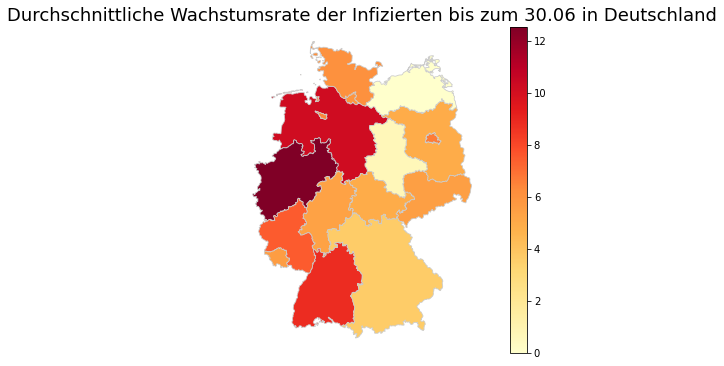

In [14]:
DEmap = gpd.read_file("geomap/vg2500_bld.shp")

merged = DEmap.set_index('GEN').join(durchwachstumfnl.set_index('Bundesland'))

column = durchwachstumfnl['AGR']
max_Wachstum = column.max()
vmin, vmax = 0, max_Wachstum
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

# Erstellung der Deutschlandkarte
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column='AGR', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Entfernt die x und y Achse
ax.axis('off')

ax.set_title('Durchschnittliche Wachstumsrate der Infizierten bis zum 30.06 in Deutschland', fontdict={'fontsize': '18','fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In dieser Deutschlandkarte ist die durchschnittliche tägliche Wachstumsrate der Infizierten in Deutschland für jedes Bundesland visualisiert dargestellt. Man kann sehen, dass die meisten Bundesländer eine geringe Wachstumsrate haben, jedoch NRW eine sehr hohe.

In [15]:


lm = smf.ols('AGR ~ Dichte',data = compLKfnl).fit()
lm.params
trend = pd.DataFrame({'Dichte': [compLKfnl.Dichte.min(), compLKfnl.Dichte.max()]})
lm.predict(trend)
preds = lm.predict(trend)

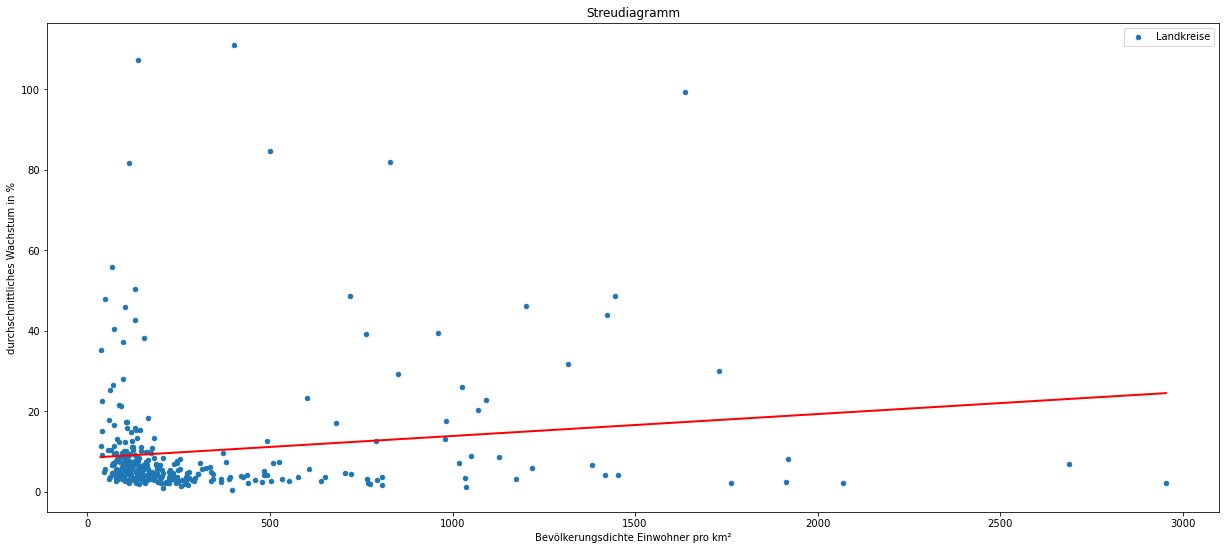

In [16]:
ax = plt.gca()
compLK.plot(kind='scatter', x = 'Bev.D.Ew./km²', y= 'AGR', ax=ax, label="Landkreise")

plt.plot(trend, preds, c='red', linewidth=2)

ax.set_title('Streudiagramm')
ax.set_ylabel('durchschnittliches Wachstum in %')
_=ax.set_xlabel('Bevölkerungsdichte Einwohner pro km²')

In [17]:
lm.params

Intercept    8.384567
Dichte       0.005444
dtype: float64

In diesem Scatterplot kann man Mithilfe der Trendlinie sehen, dass es einen Zusammenhang zwischen der Bevölkerungsdichte und der durchschnittlichen Wachstumsrate der Coronainfizierungen gibt. Je höher die Bevölkerungsdichte, desto höher ist auch der durchschnittliche Wachstums. Bei einer x höheren Bevölerungsdichte würde das durchschnittliche Wachstum um 0.083846 + 0.000054x steigen.

In [18]:
lm2 = smf.ols('AGR ~ Density',data = DFCounty).fit()
lm2.params
trend2 = pd.DataFrame({'Density': [DFCounty.Density.min(), DFCounty.Density.max()]})
lm2.predict(trend2)
preds2 = lm2.predict(trend2)

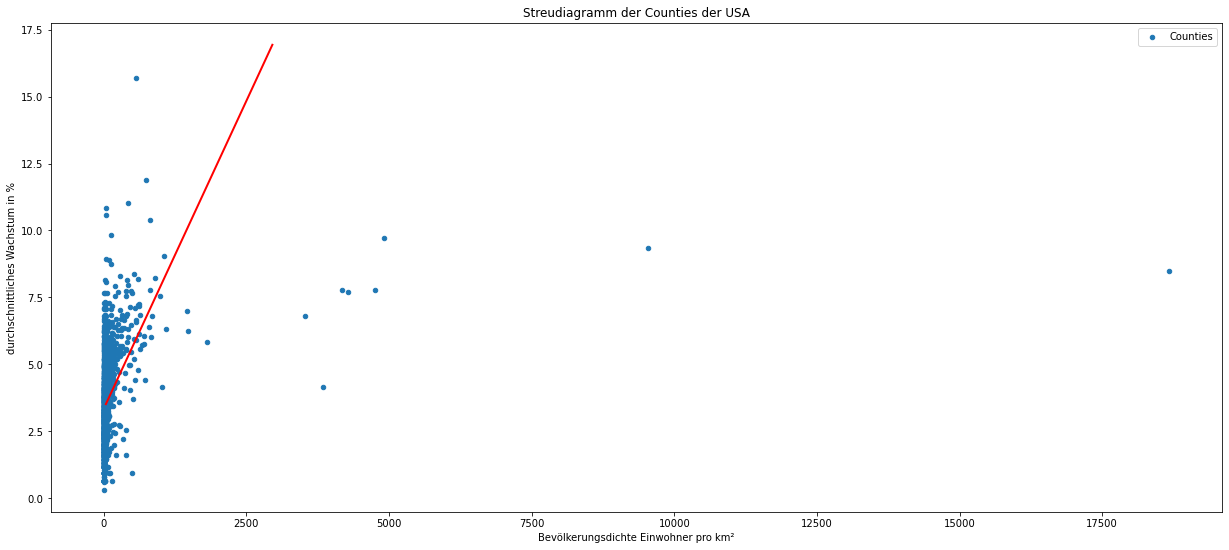

In [19]:
ax = plt.gca()

#Hiermit könnte man die 2 am meisten Bevölkerten Counties löschen, da man sie als Außreißer sehen kann
#for j in range(2):    
#    idx = DFCounty['Density'].idxmax()
#    DFCounty = DFCounty.drop(idx)
plt.plot(trend, preds2, c='red', linewidth=2)

DFCounty.plot(kind='scatter', x = 'Density', y= 'AGR', ax=ax, label="Counties")
ax.set_title('Streudiagramm der Counties der USA')
ax.set_ylabel('durchschnittliches Wachstum in %')
_=ax.set_xlabel('Bevölkerungsdichte Einwohner pro km²')

In [20]:
lm2.params

Intercept    3.504371
Density      0.000720
dtype: float64

Man sieht, dass die zwei Funktionen von deutschen und amerikanischen Gebieten relativ ähnlich verlaufen, jedoch gibt es in Amerika mehr ausreißer. 

In [21]:
durchwachstumfnl.describe()

,AGR
count,17.000000
mean,8.591170
std,1.799148
min,5.034648
25%,8.006802
50%,8.540945
75%,9.025343
max,12.542029


In [22]:
compLK.describe()

,AGR,Bev.D.Ew./km²
count,322.000000,322.000000
mean,10.106238,316.279503
std,15.063383,409.852275
min,0.516924,36.000000
25%,3.515457,106.000000
50%,5.343918,160.000000
75%,9.073802,301.750000
max,110.979221,2954.000000


In [23]:
d['Hochsauerlandkreis'].describe()

,cases,cases_per_100k,deaths,deaths_per_100k,täglicher Wachstum,dailycases,Rate,kumcases,dailydeaths,kumdeaths
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,413.058824,158.579060,4.485294,1.721966,0.017012,14.264706,2.085031,710.411765,0.264706,4.558824
std,160.697257,61.693931,7.306698,2.805142,0.116643,32.436674,10.709041,232.711226,1.589308,7.438067
min,109.000000,41.846600,0.000000,0.000000,-0.617544,0.000000,-61.754386,252.000000,0.000000,0.000000
25%,252.750000,97.034225,0.000000,0.000000,0.001647,1.000000,0.167025,482.000000,0.000000,0.000000
50%,449.000000,172.377400,0.000000,0.000000,0.010620,5.500000,1.273942,783.000000,0.000000,0.000000
75%,560.500000,215.183775,13.250000,5.086875,0.034457,15.250000,4.486483,921.500000,0.000000,13.250000
max,609.000000,233.803600,18.000000,6.910500,0.316547,252.000000,24.460432,970.000000,13.000000,18.000000


In [24]:
DFCounty.describe()

,AGR,Area,Population,Density
count,1637.000000,1637.000000,1.637000e+03,1637.000000
mean,3.568806,2885.551909,1.233841e+05,89.552584
std,1.667224,4006.641300,4.015028e+05,590.929109
min,0.310559,67.262300,7.220000e+02,0.196519
25%,2.412748,1241.827300,1.238800e+04,6.270132
50%,3.414753,1831.414900,2.839300e+04,16.602977
75%,4.483766,2746.384200,7.925500e+04,44.615746
max,15.704115,52075.550100,1.003911e+07,18671.140601


In [25]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
km.fit(compLKfnl)
y_km = km.predict(compLKfnl)

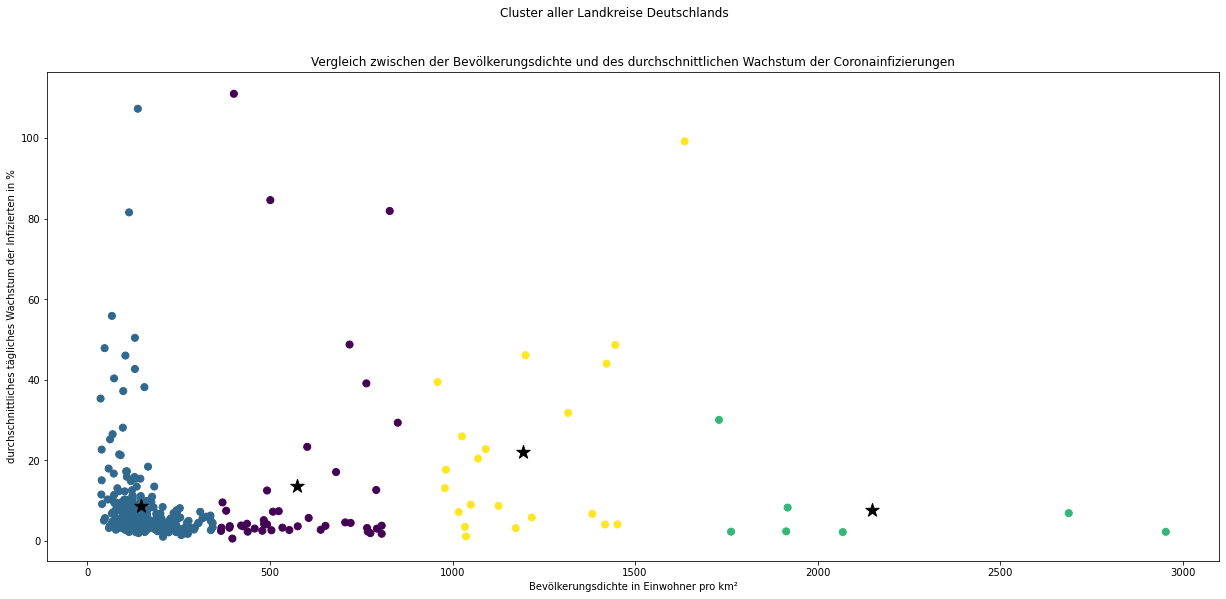

In [26]:
plt.scatter(compLKfnl["Dichte"], compLKfnl['AGR'], c=y_km, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='*',s=200, alpha=1)
plt.title("Vergleich zwischen der Bevölkerungsdichte und des durchschnittlichen Wachstum der Coronainfizierungen")
plt.suptitle("Cluster aller Landkreise Deutschlands")
plt.ylabel("durchschnittliches tägliches Wachstum der Infizierten in %")
_=plt.xlabel('Bevölkerungsdichte in Einwohner pro km²')

Cluster des zuvor erstellen Streudiagramms mit 4 Centers

In [27]:
DFCountyfnl = DFCounty.drop(columns=['County','Area','Population'])

#DFCountyfnl = DFCountyfnl.to_numpy()
#DFCountyfnl

In [28]:
import mglearn as mg
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [29]:
test = pd.DataFrame()
test = DFCountyfnl
test['Typ'] = 0
test = test.rename(columns={'Density':'Dichte'})
test2 = pd.DataFrame()
test2 = compLKfnl
test2['Typ'] = 1
test = test.append(test2)

In [30]:
y = test['Typ'].to_numpy()
X = test[['AGR','Dichte']].to_numpy()

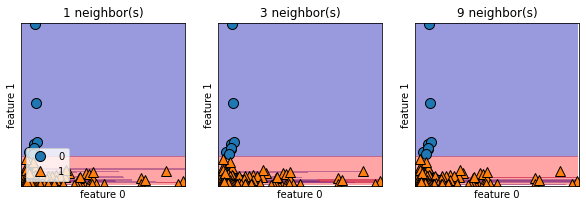

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    
    mg.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mg.discrete_scatter(X[:,0],X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc=3)
plt.show()

In [32]:
print("Test set score: {:.5f}".format(score))
print("Test set predictions:\n{}".format(pred))

Test set score: 0.86939
Test set predictions:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0

Neares Neigbor Untersuchung zwischen den zwei Merkmalen Bevölerungsdichte und durchschnittliche Wachstumsrate bei amerikanischen Counties und deutschen Landkreisen. Klassen habe ich hierbei. Deutschland = 1 und Amerika = 0 gemacht. Es sollte gesagt werden, dass es mehjr amerikanische Einträge gibt. Über eine bessere Klassenunterteilung sollte man sich auch noch gedanken machen. 
Hierbei ist alles schwer zu Erkennen, da es ein paar Ausreißer gibt. Man sollte überlegen wie viele Außreißer man heraussnimmt. Wie schon bei dem Scatterplot 